# DECISSION TREE IN PYTHON

## Tahap 1: Membaca Data

In [1]:
#import library
import pandas as pd

In [2]:
#import data
datapilot = pd.read_csv('D:\data propensity.csv',delimiter=',') 

#menampilkan beberapa baris pertama datapilot
datapilot.head()

,No,Saldo,Frek ATM,Jenis Kelamin,tempat tinggal,Frek Supermarket,Frek Dept Store,Usia,Tertarik
0,1,5.494,9,Perempuan,rural,2,2,44,0
1,2,4.700,3,Perempuan,urban,2,4,39,0
2,3,4.496,5,Laki-Laki,rural,3,2,36,0
3,4,4.360,5,Perempuan,urban,8,2,37,0
4,5,18.866,9,Laki-Laki,rural,2,3,30,1


## Tahap 2: Melihat hubungan antara prediktor dengan variabel target

In [3]:
#crosstab antara Jenis Kelamin dengan variabel Tertarik
pd.crosstab(datapilot['Jenis Kelamin'],datapilot['Tertarik'])

Tertarik,0,1
Jenis Kelamin,,
Laki-Laki,2962,765
Perempuan,3027,746


In [4]:
#crosstab antara Jenis Kelamin dengan variabel Tertarik  (persen baris)
pd.crosstab(datapilot['Jenis Kelamin'],datapilot['Tertarik'],normalize='index')

Tertarik,0,1
Jenis Kelamin,,
Laki-Laki,0.794741,0.205259
Perempuan,0.802279,0.197721


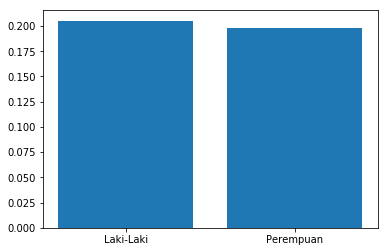

In [6]:
cross= pd.crosstab(datapilot['Jenis Kelamin'],datapilot['Tertarik'],normalize='index')

#import library
import matplotlib.pyplot as plt

#menampilkan bar plot
plt.bar(cross.index,cross[1])
plt.show()

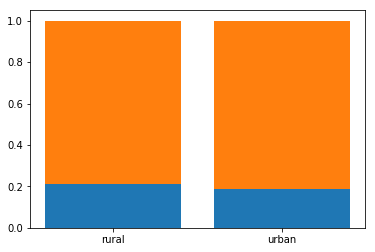

In [7]:
cross= pd.crosstab(datapilot['tempat tinggal'],datapilot['Tertarik'],normalize='index')

plt.bar(cross.index,cross[1])
plt.bar(cross.index,cross[0],bottom=cross[1])
plt.show()

In [8]:
#Binning frekuensi ATM
bins = [-1,3,10,40]
label = [1,2,3]
datapilot['Frek ATM bin']= pd.cut(datapilot['Frek ATM'],bins=bins, labels=label).astype(int)
datapilot.head()

,No,Saldo,Frek ATM,Jenis Kelamin,tempat tinggal,Frek Supermarket,Frek Dept Store,Usia,Tertarik,Frek ATM bin
0,1,5.494,9,Perempuan,rural,2,2,44,0,2
1,2,4.700,3,Perempuan,urban,2,4,39,0,1
2,3,4.496,5,Laki-Laki,rural,3,2,36,0,2
3,4,4.360,5,Perempuan,urban,8,2,37,0,2
4,5,18.866,9,Laki-Laki,rural,2,3,30,1,2


<BarContainer object of 3 artists>

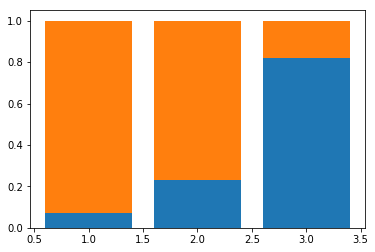

In [9]:
cross= pd.crosstab(datapilot['Frek ATM bin'],datapilot['Tertarik'],normalize='index')

plt.bar(cross.index,cross[1])
plt.bar(cross.index,cross[0],bottom=cross[1])

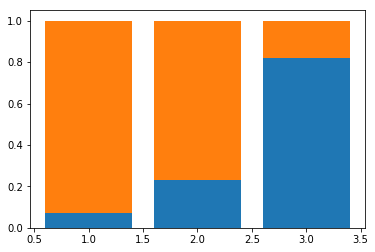

In [10]:
cross= pd.crosstab(datapilot['Frek ATM bin'],datapilot['Tertarik'],normalize='index')

plt.bar(cross.index,cross[1])
plt.bar(cross.index,cross[0],bottom=cross[1])
plt.show()

## Tahap 3: Membuat data training dan data testing

In [11]:
#membuat variabel dummy dari variabel yang memiliki type string
datapilot['jk']=datapilot['Jenis Kelamin'].astype('category').cat.codes
datapilot['dtempat']=datapilot['tempat tinggal'].astype('category').cat.codes


#memisahkan data variabel X dan variabel Y
x=datapilot[['Saldo','Frek ATM', 'jk','dtempat','Frek Supermarket','Frek Dept Store','Usia']]
y=datapilot['Tertarik']
x.head()

,Saldo,Frek ATM,jk,dtempat,Frek Supermarket,Frek Dept Store,Usia
0,5.494,9,1,0,2,2,44
1,4.700,3,1,1,2,4,39
2,4.496,5,0,0,3,2,36
3,4.360,5,1,1,8,2,37
4,18.866,9,0,0,2,3,30


In [12]:
#membagi data menjadi gugus data training (70%) dan testing (30%) secara random
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=101)

## Tahap 4: Membuat pohon klasifikasi berdasarkan data training

In [13]:
#pembuatan model berdasarkan data training
from sklearn.tree import DecisionTreeClassifier
pohon = DecisionTreeClassifier(min_samples_split=500, max_depth=4) #min split dan max depthnya tidak default

In [14]:
#model data training
pohon.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=500,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [15]:
#import library untuk menggambar/visualisasi pohon klasifikasi
from sklearn import tree
from sklearn.tree import export_graphviz
import graphviz


In [16]:
#melihat type data dari masing-masing variabel
datapilot.dtypes

No                    int64
Saldo               float64
Frek ATM              int64
Jenis Kelamin        object
tempat tinggal       object
Frek Supermarket      int64
Frek Dept Store       int64
Usia                  int64
Tertarik              int64
Frek ATM bin          int32
jk                     int8
dtempat                int8
dtype: object

In [17]:
#mengubah type data Int menjadi string
y_baru=datapilot['Tertarik'].apply(str)
y_baru.head()

0    0
1    0
2    0
3    0
4    1
Name: Tertarik, dtype: object

In [18]:
#melihat type data dari sebuah variabel
y_baru.dtypes

dtype('O')

In [19]:
#setting features name yang akan digunakan pada pembuatan pohon klasifikasi
fitur = list(datapilot.columns[1:8])
fitur

['Saldo',
 'Frek ATM',
 'Jenis Kelamin',
 'tempat tinggal',
 'Frek Supermarket',
 'Frek Dept Store',
 'Usia']

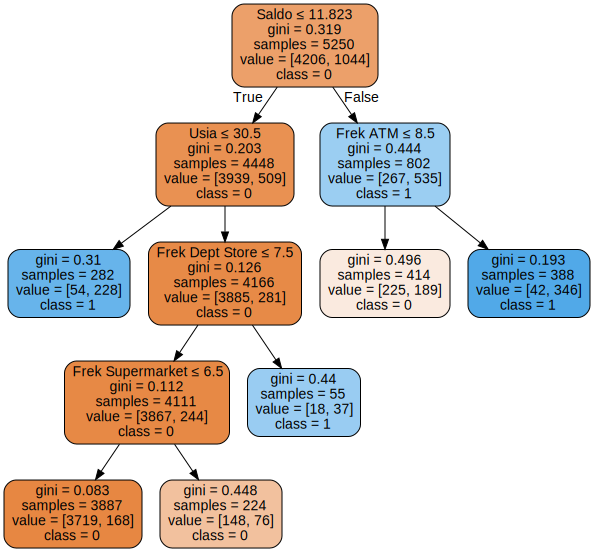

In [20]:
#membuat tampilan pohon klasifikasi
dot_data = tree.export_graphviz(pohon.fit(x_train,y_train),
                               feature_names=fitur,
                               class_names=pd.Series(y_baru).astype(str).unique(),
                               filled=True, rounded=True,
                               special_characters=True,
                               out_file=None)
grafik=graphviz.Source(dot_data)
grafik.render("Kyphosis tree")
grafik


## Tahap 5: Evaluasi model

In [21]:
x_train.head()

,Saldo,Frek ATM,jk,dtempat,Frek Supermarket,Frek Dept Store,Usia
7288,6.926,6,1,0,5,2,25
2685,12.467,1,1,1,4,2,41
5745,1.426,1,1,0,3,10,30
6433,7.057,4,1,1,1,1,31
870,2.641,7,0,0,5,1,38


In [22]:
prediksi=pohon.predict(x_train)
prediksi.shape,y_train.shape

((5250,), (5250,))

In [23]:
#classification report
from sklearn.metrics import classification_report
print (classification_report(y_train,prediksi))

             precision    recall  f1-score   support

          0       0.90      0.97      0.94      4206
          1       0.84      0.59      0.69      1044

avg / total       0.89      0.90      0.89      5250



In [24]:
#melihat nilai akurasi, presisi, sensitifiti dan Specificity data training
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_train, prediksi))
print("Precision:",metrics.precision_score(y_train, prediksi))
print("Recall:",metrics.recall_score(y_train, prediksi))
print("Specificity:",metrics.recall_score(y_train, prediksi))

Accuracy: 0.8958095238095238
Precision: 0.8427586206896551
Recall: 0.5852490421455939
Specificity: 0.5852490421455939


### Tugas 1: 

1. Hitunglah nilai akurasi, presisi, dan recall dari tree yang sudah dihasilkan dengan dasar data testing.
2. Buatlah pohon klasifikasi, dengan minimum sample split sebesar 300 dan maxdepth = 4. Adakah perbedaan hasil pohon klasifikasi yang diperoleh?  Jika ada, hitung nilai akurasi, presisi, dan recall pohon yang baru. Beri penjelasan terhadap hasil yang diperoleh.
2. Buatlah pohon klasifikasi, dengan minimum sample split sebesar 300 dan maxdepth = 5. Adakah perbedaan hasil pohon klasifikasi yang diperoleh?  Jika ada, hitung nilai akurasi, presisi, dan recall pohon yang baru. Beri penjelasan terhadap hasil yang diperoleh.

## Tahap 6: Prediksi data pelanggan lain yang menjadi target

In [26]:
#import data
datalain = pd.read_csv('D:\ingin diprediksi.csv',delimiter=',') 
datalain.head()

,No,Saldo,Frek ATM,Jenis Kelamin,tempat tinggal,Frek Supermarket,Frek Dept Store,Usia
0,7501,10.173,6,Laki-Laki,urban,3,7,33
1,7502,19.558,10,Laki-Laki,urban,3,6,37
2,7503,31.807,15,Laki-Laki,rural,6,7,40
3,7504,12.924,13,Laki-Laki,urban,5,1,38
4,7505,0.115,0,Laki-Laki,rural,3,0,45


In [27]:
#membuat dummy variable dari variabel yang memiliki type string
datalain['jk']=datalain['Jenis Kelamin'].astype('category').cat.codes
datalain['dtempat']=datalain['tempat tinggal'].astype('category').cat.codes

#Pemilihan variabel X yang akan digunakan
x_lain=datalain[['Saldo','Frek ATM', 'jk','dtempat','Frek Supermarket','Frek Dept Store','Usia']]

In [28]:
#menghasikan nilai prediksi peluang ketertarikan bagi setiap pelanggan baru
y_prediksilain = pohon.predict(x_lain)
y_prediksilain

array([0, 1, 1, ..., 0, 0, 1], dtype=int64)

In [29]:
#convert vektor menjadi data frame
y_prediksilain=pd.DataFrame(y_prediksilain,columns=['prediksi_pohon'])
y_prediksilain.head()

,prediksi_pohon
0,0
1,1
2,1
3,1
4,0


In [30]:
y_prediksilain['prediksi_pohon'].value_counts()

0    5236
1     930
Name: prediksi_pohon, dtype: int64

In [31]:
data_lengkap_pohon=datalain.join(y_prediksilain, how='outer')
data_lengkap_pohon.head()

,No,Saldo,Frek ATM,Jenis Kelamin,tempat tinggal,Frek Supermarket,Frek Dept Store,Usia,jk,dtempat,prediksi_pohon
0,7501,10.173,6,Laki-Laki,urban,3,7,33,0,1,0
1,7502,19.558,10,Laki-Laki,urban,3,6,37,0,1,1
2,7503,31.807,15,Laki-Laki,rural,6,7,40,0,0,1
3,7504,12.924,13,Laki-Laki,urban,5,1,38,0,1,1
4,7505,0.115,0,Laki-Laki,rural,3,0,45,0,0,0


# Random Forests

Mari kita bandingkan antara decission tree dengan random forest.

## Tahap 1: Membuat model random forest

In [32]:
from sklearn.ensemble import RandomForestClassifier

C:\Users\bagusco\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [33]:
rft = RandomForestClassifier(n_estimators=100)
rft.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

## Tahap 2: Prediksi dan Evaluasi

In [34]:
#prediksi
rft_pred = rft.predict(x_train)
rft_pred

array([1, 0, 1, ..., 1, 0, 0], dtype=int64)

In [35]:
#Evaluasi klasifikasi report 
from sklearn.metrics import classification_report
print(classification_report(y_train,rft_pred))


             precision    recall  f1-score   support

          0       1.00      1.00      1.00      4206
          1       1.00      1.00      1.00      1044

avg / total       1.00      1.00      1.00      5250



In [36]:
#melihat nilai akurasi, presisi, sensitifiti dan Specificity data training
prediksi_test=pohon.predict(x_train)
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_train, rft_pred))
print("Precision:",metrics.precision_score(y_train, rft_pred))
print("Recall:",metrics.recall_score(y_train, rft_pred))
print("Specificity:",metrics.recall_score(y_train, rft_pred))

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
Specificity: 1.0


In [37]:
tabTest=pd.crosstab(y_train,rft_pred)
tabTest['total']=tabTest.sum(axis=1)
tabTest

col_0,0,1,total
Tertarik,,,
0,4206,0,4206
1,0,1044,1044


### Tugas

1. Hitunglah akurasi, presisi, dan recall dari forest yang sudah diperoleh, menggunakan data testing.

## Tahap 3: Prediksi untuk data baru pada RANDOM FOREST

In [38]:
#menghasilkan y dengan prediksi dari sekumpulan x yang ada pada data 
pred_randForest=rft.predict(x_lain)
pred_randForest

array([1, 1, 1, ..., 0, 0, 1], dtype=int64)

In [39]:
#mengubah menjadi dataframe
pred_randForest=pd.DataFrame(pred_randForest,columns=['Prediksi_randForest'])
pred_randForest.head()

,Prediksi_randForest
0,1
1,1
2,1
3,1
4,0


In [40]:
pred_randForest['Prediksi_randForest'].value_counts()

0    4964
1    1202
Name: Prediksi_randForest, dtype: int64

In [41]:
data_lengkap_randForest=x_lain.join(pred_randForest, how='outer')
data_lengkap_randForest.head()

,Saldo,Frek ATM,jk,dtempat,Frek Supermarket,Frek Dept Store,Usia,Prediksi_randForest
0,10.173,6,0,1,3,7,33,1
1,19.558,10,0,1,3,6,37,1
2,31.807,15,0,0,6,7,40,1
3,12.924,13,0,1,5,1,38,1
4,0.115,0,0,0,3,0,45,0


### Tugas

1. Buat forest dengan banyaknya pohon yang terbentuk sebanyak 50. Lakukan evaluasi model yang Anda peroleh dan bandingkan dengan model sebelumnya